<a href="https://colab.research.google.com/github/ecocw/114_bigdata/blob/U04.%E8%B3%87%E6%96%99%E6%8E%A2%E7%B4%A2%E8%88%87%E8%A6%96%E8%A6%BA%E5%8C%96/Code_U04_2_Python%E8%B3%87%E6%96%99%E6%8E%A2%E7%B4%A2%E5%8F%8A%E8%A6%96%E8%A6%BA%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ★1. 基本統計分析

## (1) 集中趨勢 (Central Tendency)

    集中趨勢表示一組數據中央點位置所在的一個指標

    ==================   ==================================
     np.mean()            算術平均數（arithmatice mean）
     st.gmean()           幾何平均數（geometric mean）
     np.median()          中位數（median）
     st.mode()            眾數（mode）
     =================   ===================================

    #### numpy沒有內建幾何平均gmean及眾數mode，可用stats

In [56]:
import numpy as np
import scipy.stats as st

##腹圍數據
A= [103,97,101,106,103,100,99,104,97,102]

mean=np.mean(A)              #算數平均數
gmean=st.gmean(A)            #幾何平均數
med=np.median(A)             #中位數
mode=st.mode(A)              #眾數返回tuple(眾數, 出現次數)

print('算術平均數(mean) = ', mean)
print('幾何平均數(geometric mean) = ',gmean )
print('中位數(median) = ', med)
print("mode=", mode)
print("眾數(mode) = {} 出現次數= {}".format(mod[0], mod[1]))

算術平均數(mean) =  101.2
幾何平均數(geometric mean) =  101.1605976039599
中位數(median) =  101.5
mode= ModeResult(mode=np.int64(97), count=np.int64(2))
眾數(mode) = 97 出現次數= 2


## (2) 離散趨勢（Dispersion）

In [5]:
import numpy as np
import scipy.stats as st

A= [103,97,101,106,103,100,99,104,97,102]

MAX=np.max(A)
MIN=np.min(A)
RANGE=np.ptp(A)

Q1=np.quantile(A,0.25)  #第1四分位 或percentile(A, 25)
Q3=np.quantile(A,0.75)  #第3四分位 或percentile(A, 75)
IQR=Q3-Q1  #四分位距

print('全距= MAX-MIN =',RANGE)
print('四分位距= Q3-Q1 =',IQR)

全距= MAX-MIN = 9
四分位距= Q3-Q1 = 3.75


In [7]:
import numpy as np
import scipy.stats as st

A= [103,97,101,106,103,100,99,104,97,102]

VAR=np.var(A)       #變異數
STD=np.std(A)       #標準差
CV=np.std(A)/np.mean(A)    #變異係數

print('變異數   VAR =',VAR)
print('標準數   STD =',STD)
print('變異係數  CV =',CV)

變異數   VAR = 7.960000000000001
標準數   STD = 2.821347195933177
變異係數  CV = 0.027878924860999774


## (3) 偏態（Skewness）與峰度（Kurtosis）

In [11]:
import numpy as np
from scipy import stats as st

# 腹圍數據
A= [103,97,101,106,103,100,99,104,97,102]

SK=st.skew(A)          # 偏態 Skewness
KU=st.kurtosis(A)      # 峰度 Kurtosis (Fisher 定義，常態分布=0)
JB=st.jarque_bera(A)   # Jarque-Bera 常態性檢定 返回tuple (統計量, p-value)

print(f'偏態 = {SK:.4f}')   #.4f 列印小數點後4位
print(f'峰度 = {KU:.4f}')
print("JB =", JB)           # 直接印出 tuple
 # JB[0]直接印出 tuple統計量 JB[1]為機率值
print(f"JB統計值 = {JB[0]:.4f} p-value= {JB[1]:.4f}")

偏態 = -0.0705
峰度 = -1.0090
JB = SignificanceResult(statistic=np.float64(0.43246174833163586), pvalue=np.float64(0.8055492998801433))
JB統計值 = 0.4325 p-value= 0.8055


## (4) 相關係數及共變數

In [12]:
import pandas as pd
import numpy as np
from numpy import array, corrcoef,cov

list= [[103,100],[97,98],[101,100],[106,105],[103,103],
       [100,105],[99,100],[104,102],[97,95],[102,100]]

# 將list變成dataframe
df = pd.DataFrame(list)
print(df.head())

# 計算兩組數的 pearson相關係數及共變數
corr=df.corr('pearson')
cov=df.cov()

# 返回結果
print('\n')
print('相關係數矩陣=','\n',corr)
print('\n')         #跳行
print('共變數矩陣=','\n', cov)

     0    1
0  103  100
1   97   98
2  101  100
3  106  105
4  103  103


相關係數矩陣= 
           0         1
0  1.000000  0.707489
1  0.707489  1.000000


共變數矩陣= 
           0         1
0  8.844444  6.488889
1  6.488889  9.511111


## ★ 範例：下載每日股價，計算報酬，並進行敍述統計

In [13]:
!pip install yfinance

In [31]:
import numpy as np
import pandas as pd
import yfinance as yf

#表格顯示方式小數點後4位
pd.options.display.float_format = '{:.4f}'.format
#定義樣本期間:
start = '2020-01-01'
end = '2024-12-31'

#定義資產名稱
assets = ['0050.TW','0052.TW','0055.TW','0056.TW','006208.TW',  '00690.TW','00692.TW', '00701.TW','00728.TW','00730.TW','00733.TW','^TWII']

#下載資料
df= yf.download(assets, start = start, end = end, auto_adjust=True)
prices=df['Close']

# 計算單期連續複利報酬
#落後一期的價格price.shift(1)
#dropna() 移除第一筆因為沒有前期價格而產生的 NaN
RET=np.log(prices/prices.shift(1)).dropna()
display(RET.head())

[*********************100%***********************]  12 of 12 completed


Ticker,0050.TW,0052.TW,0055.TW,0056.TW,006208.TW,00690.TW,00692.TW,00701.TW,00728.TW,00730.TW,00733.TW,^TWII
Date,,,,,,,,,,,,
2020-01-03,0.0000,-0.0062,0.0005,0.0031,-0.0009,-0.0037,0.0000,0.0021,-0.0045,-0.0033,0.0052,0.0008
2020-01-06,-0.0129,-0.0110,-0.0053,-0.0076,-0.0074,-0.0103,-0.0079,-0.0051,-0.0091,-0.0022,0.0000,-0.0131
2020-01-07,-0.0031,-0.0035,-0.0005,-0.0094,-0.0075,-0.0050,-0.0046,-0.0017,-0.0083,-0.0049,-0.0273,-0.0061
2020-01-08,-0.0047,-0.0077,-0.0053,-0.0066,-0.0047,-0.0008,-0.0038,-0.0025,-0.0088,-0.0016,-0.0093,-0.0053
2020-01-09,0.0135,0.0167,0.0016,0.0070,0.0141,0.0071,0.0121,0.0952,0.0107,0.0066,0.0141,0.0129


In [3]:
#敍述統計分析
RET.describe()

Ticker,0050.TW,0052.TW,0055.TW,0056.TW,006208.TW,00690.TW,00692.TW,00701.TW,00728.TW,00730.TW,00733.TW,^TWII
count,1213.0000,1213.0000,1213.0000,1213.0000,1213.0000,1213.0000,1213.0000,1213.0000,1213.0000,1213.0000,1213.0000,1213.0000
mean,0.0007,0.0010,0.0005,0.0005,0.0007,0.0006,0.0007,0.0004,0.0005,0.0004,0.0009,0.0005
std,0.0133,0.0154,0.0101,0.0096,0.0124,0.0115,0.0117,0.0092,0.0129,0.0098,0.0167,0.0118
min,-0.0957,-0.1027,-0.0763,-0.0791,-0.0888,-0.0764,-0.0896,-0.0661,-0.0909,-0.0921,-0.1015,-0.0872
25%,-0.0057,-0.0069,-0.0042,-0.0036,-0.0054,-0.0049,-0.0050,-0.0032,-0.0049,-0.0035,-0.0070,-0.0053
50%,0.0006,0.0010,0.0004,0.0009,0.0006,0.0009,0.0007,0.0008,0.0008,0.0005,0.0022,0.0010
75%,0.0077,0.0091,0.0054,0.0055,0.0073,0.0070,0.0071,0.0045,0.0074,0.0058,0.0101,0.0069
max,0.0765,0.0953,0.0562,0.0634,0.0586,0.0499,0.0695,0.0952,0.0531,0.0510,0.0709,0.0617


In [4]:
import numpy as np
import pandas as pd
import scipy.stats as st

#RET= pd.read_excel('ALL_RET.xlsx',index_col='Date') #讀取日報酬率資料
pd.options.display.float_format = '{:.4f}'.format    #表格顯示方式小數點後4位

#創建空白dataframe存放資料
stats = pd.DataFrame()
#計算統計
stats['Mean'] = RET.mean()
stats['Median'] = RET.median()
stats['Max'] = RET.max()
stats['Min'] = RET.min()
stats['Range'] = (stats['Max']-stats['Min'])
stats['Std.Dev'] = RET.std()
stats['Skew'] =st.skew(RET)
stats['Excess Kurt'] = st.kurtosis(RET)
#stats['Jarque_Bera'] = ((stats['Skew']**2/6) +(stats['Excess Kurt'])**2/24)*RET.count()

for i in RET.columns:
    jb_stat, jb_pvalue = st.jarque_bera(RET[i])
    stats.loc[i, 'JB_stat'] = jb_stat
    stats.loc[i, 'JB_pvalue'] = jb_pvalue
display(stats)

,Mean,Median,Max,Min,Range,Std.Dev,Skew,Excess Kurt,JB_stat,JB_pvalue
Ticker,,,,,,,,,,
0050.TW,0.0007,0.0006,0.0765,-0.0957,0.1722,0.0133,-0.3263,5.1902,1383.0166,0.0000
0052.TW,0.0010,0.0010,0.0953,-0.1027,0.1980,0.0154,-0.0446,4.6637,1099.6735,0.0000
0055.TW,0.0005,0.0004,0.0562,-0.0763,0.1325,0.0101,-0.7137,8.3515,3628.0871,0.0000
0056.TW,0.0005,0.0009,0.0634,-0.0791,0.1425,0.0096,-1.0149,8.7125,4044.7663,0.0000
006208.TW,0.0007,0.0006,0.0586,-0.0888,0.1474,0.0124,-0.2568,4.3754,980.8962,0.0000
00690.TW,0.0006,0.0009,0.0499,-0.0764,0.1263,0.0115,-0.5907,3.9782,870.4065,0.0000
00692.TW,0.0007,0.0007,0.0695,-0.0896,0.1591,0.0117,-0.4085,5.6750,1661.4404,0.0000
00701.TW,0.0004,0.0008,0.0952,-0.0661,0.1613,0.0092,-0.1874,18.2611,16861.0600,0.0000
00728.TW,0.0005,0.0008,0.0531,-0.0909,0.1440,0.0129,-0.9543,7.2405,2833.7668,0.0000


In [6]:
#corr計算相關係數
scorr=RET.corr('spearman')   #相關係數
display(scorr)

Ticker,0050.TW,0052.TW,0055.TW,0056.TW,006208.TW,00690.TW,00692.TW,00701.TW,00728.TW,00730.TW,00733.TW,^TWII
Ticker,,,,,,,,,,,,
0050.TW,1.0000,0.9485,0.6172,0.7044,0.9762,0.9254,0.9751,0.6833,0.8772,0.6781,0.5464,0.9455
0052.TW,0.9485,1.0000,0.5186,0.6848,0.9492,0.8920,0.9426,0.5902,0.8694,0.6452,0.5580,0.9179
0055.TW,0.6172,0.5186,1.0000,0.5687,0.6171,0.6246,0.6422,0.8311,0.5472,0.5432,0.4199,0.6582
0056.TW,0.7044,0.6848,0.5687,1.0000,0.7065,0.7091,0.7408,0.6782,0.7087,0.7681,0.7334,0.7876
006208.TW,0.9762,0.9492,0.6171,0.7065,1.0000,0.9240,0.9774,0.6847,0.8858,0.6808,0.5488,0.9476
00690.TW,0.9254,0.8920,0.6246,0.7091,0.9240,1.0000,0.9280,0.6734,0.8933,0.7195,0.5610,0.9187
00692.TW,0.9751,0.9426,0.6422,0.7408,0.9774,0.9280,1.0000,0.7195,0.8828,0.7032,0.5785,0.9596
00701.TW,0.6833,0.5902,0.8311,0.6782,0.6847,0.6734,0.7195,1.0000,0.6098,0.5921,0.5079,0.7198
00728.TW,0.8772,0.8694,0.5472,0.7087,0.8858,0.8933,0.8828,0.6098,1.0000,0.7093,0.5863,0.8832


# ★2. 資料視覺化
## (1) 直線圖（Line Chart)

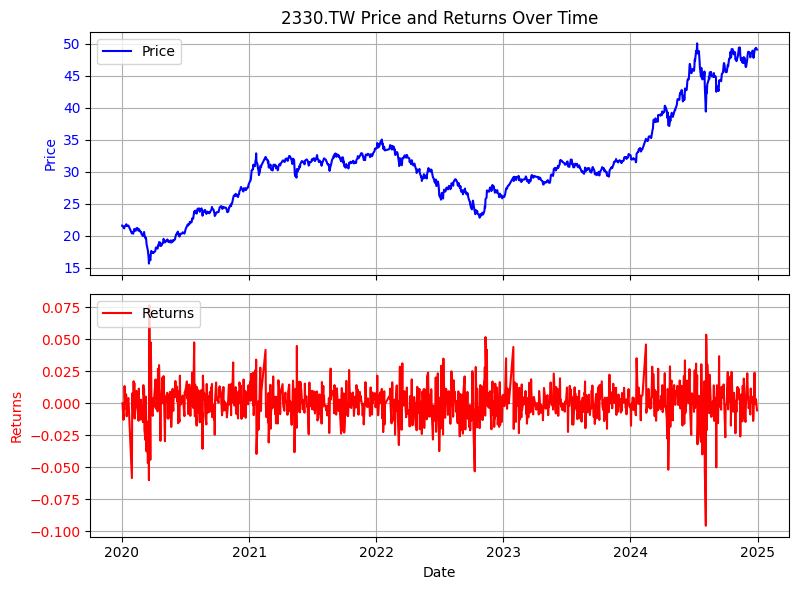

In [49]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

P_0050 = prices['0050.TW']
R_0050= RET['0050.TW']

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Plot prices on the first subplot
axes[0].plot(P_0050, label='Price', color='blue')
axes[0].set_ylabel('Price', color='blue')
axes[0].tick_params(axis='y', labelcolor='blue')
axes[0].set_title(f'{asset} Price and Returns Over Time')
axes[0].legend(loc='upper left')
axes[0].grid(True)

# Plot returns on the second subplot
axes[1].plot(R_0050, label='Returns', color='red')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Returns', color='red')
axes[1].tick_params(axis='y', labelcolor='red')
axes[1].legend(loc='upper left')
axes[1].grid(True)

fig.tight_layout()
plt.show()

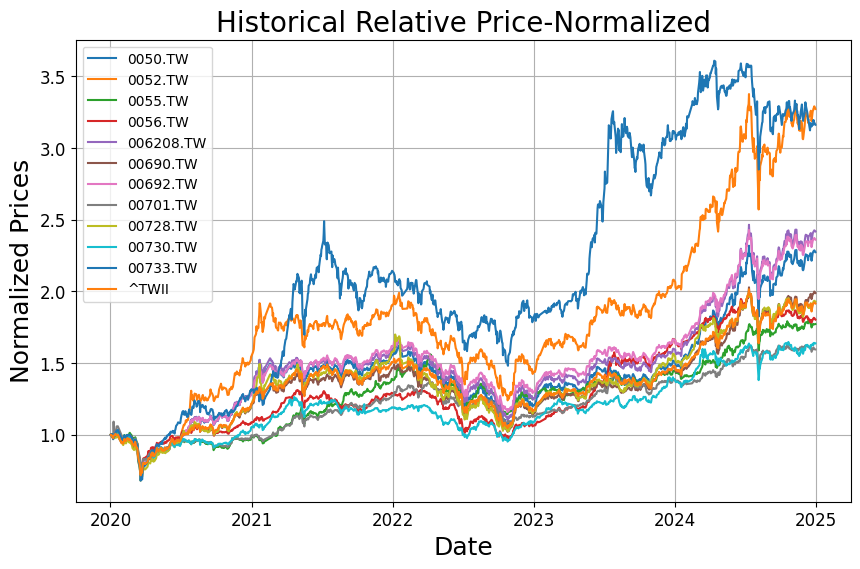

Ticker,0050.TW,0052.TW,0055.TW,0056.TW,006208.TW,00690.TW,00692.TW,00701.TW,00728.TW,00730.TW,00733.TW,^TWII
Date,,,,,,,,,,,,
2024-12-30,2.274,3.273,1.773,1.804,2.419,1.990,2.361,1.596,1.929,1.638,3.163,1.916


In [13]:
import matplotlib.pyplot as plt

# 標準化價格
normalized_series = (prices/prices.iloc[0])

#建立圖表及Axes物件
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(normalized_series)

#設置標題
plt.title('Historical Relative Price-Normalized', size=20)
#設置軸標籤
plt.xlabel('Date',fontsize=18) #設置X軸標籤
plt.ylabel('Normalized Prices',fontsize=18) #設置Y軸標籤
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid() #格線

#設置圖例
ax.legend(assets,fontsize=10,loc='best')

plt.show()  # 展示

pd.options.display.float_format = '{:.3f}'.format #表格顯示方式小數點後3位
display(normalized_series.tail(1))

## (2) 長條圖 (Box Plot)

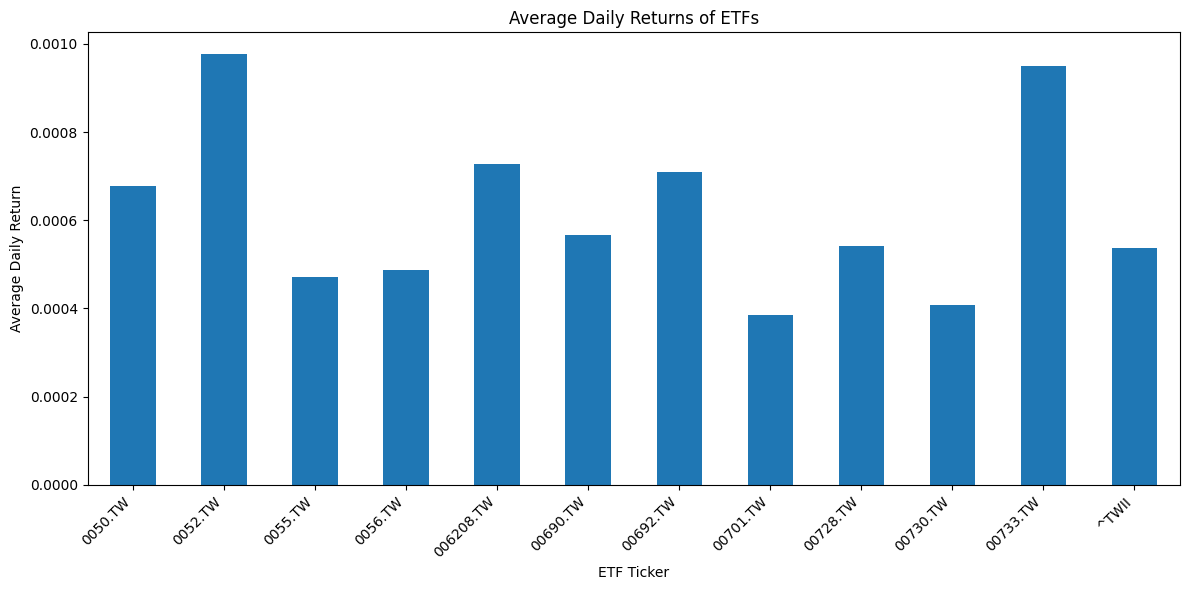

In [12]:
import matplotlib.pyplot as plt

# Extract the mean returns from the stats DataFrame
mean_returns = RET.mean()

plt.figure(figsize=(12, 6))
ax = mean_returns.plot(kind='bar')
plt.title('Average Daily Returns of ETFs')
plt.xlabel('ETF Ticker')
plt.ylabel('Average Daily Return')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

## (3) 散佈圖 (Scatter Chart)

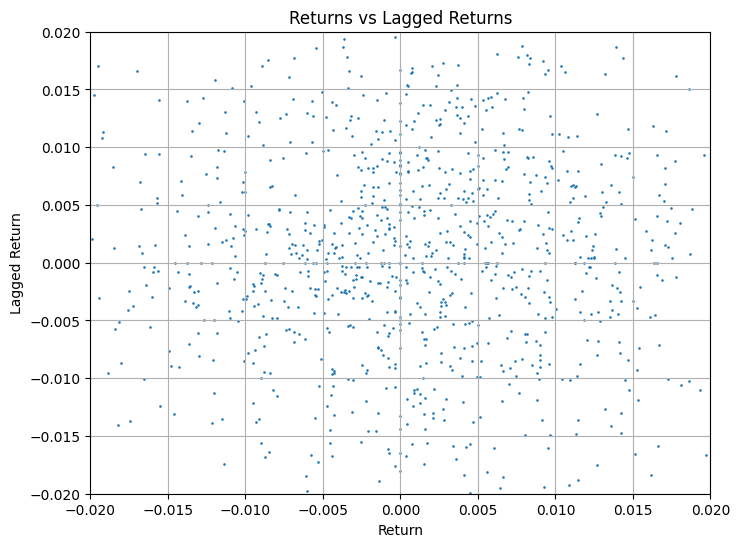

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

symbol='0050.TW'        # 設置代碼
ret=RET[symbol]
ret_1=ret.shift(1)

plt.figure(figsize=(8, 6))

plt.title('Returns vs Lagged Returns')
plt.xlabel('Return')
plt.ylabel('Lagged Return')
# use the scatter function
plt.xlim([-0.02,0.02])
plt.ylim([-0.02,0.02])
plt.scatter(ret,ret_1,s=3, marker='.')
plt.grid(True)
plt.show()

## (4) 盒鬚圖 (Box Plot)

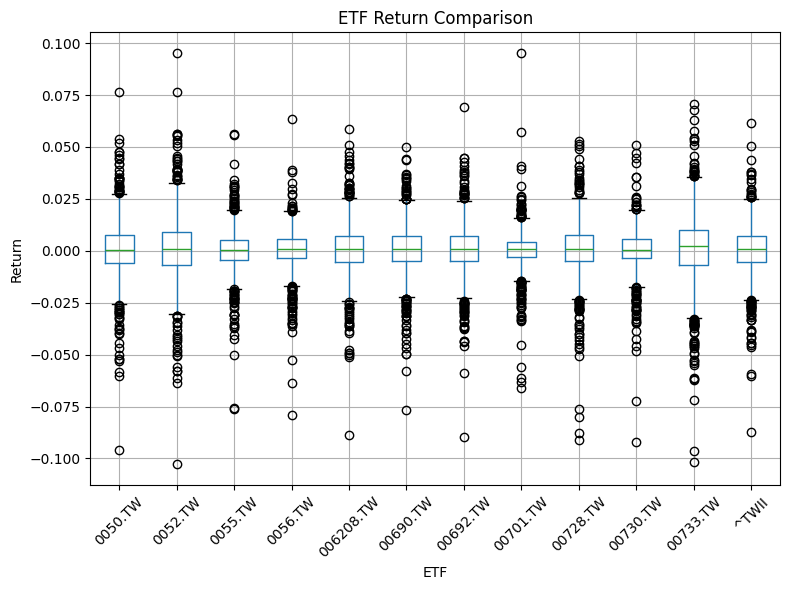

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
RET.boxplot()
plt.title('ETF Return Comparison')
plt.ylabel('Return')
plt.xlabel('ETF')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## (5) QQ圖

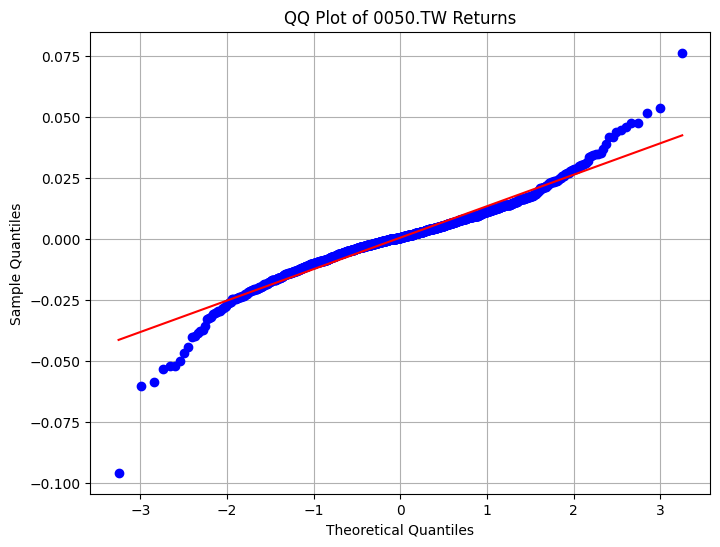

In [43]:
import matplotlib.pyplot as plt
import scipy.stats as st

# Get the returns for 0050.TW
ret_0050 = RET['0050.TW']

# Create the QQ plot
plt.figure(figsize=(8, 6))
st.probplot(ret_0050, dist="norm", plot=plt)
plt.title('QQ Plot of 0050.TW Returns')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

## (6) 迴歸圖 (Regression Chart)

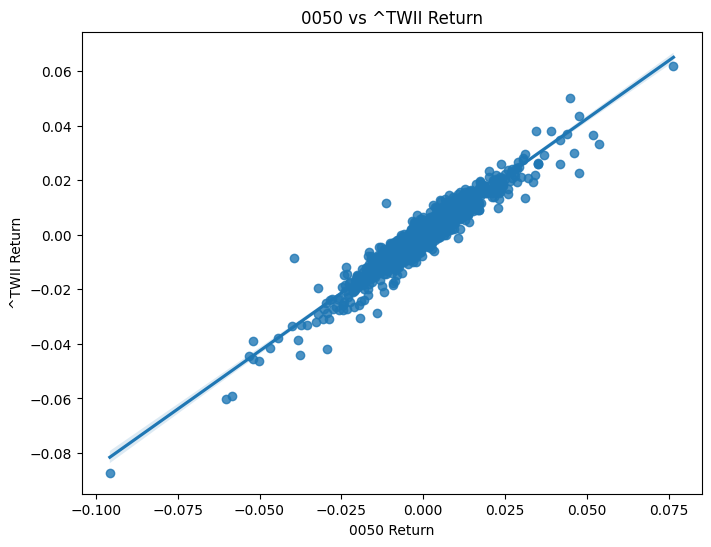

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(x=RET['0050.TW'], y=RET['^TWII'])
plt.title('0050 vs ^TWII Return')
plt.xlabel('0050 Return')
plt.ylabel('^TWII Return')
plt.show()

## (7) 多變量成對圖

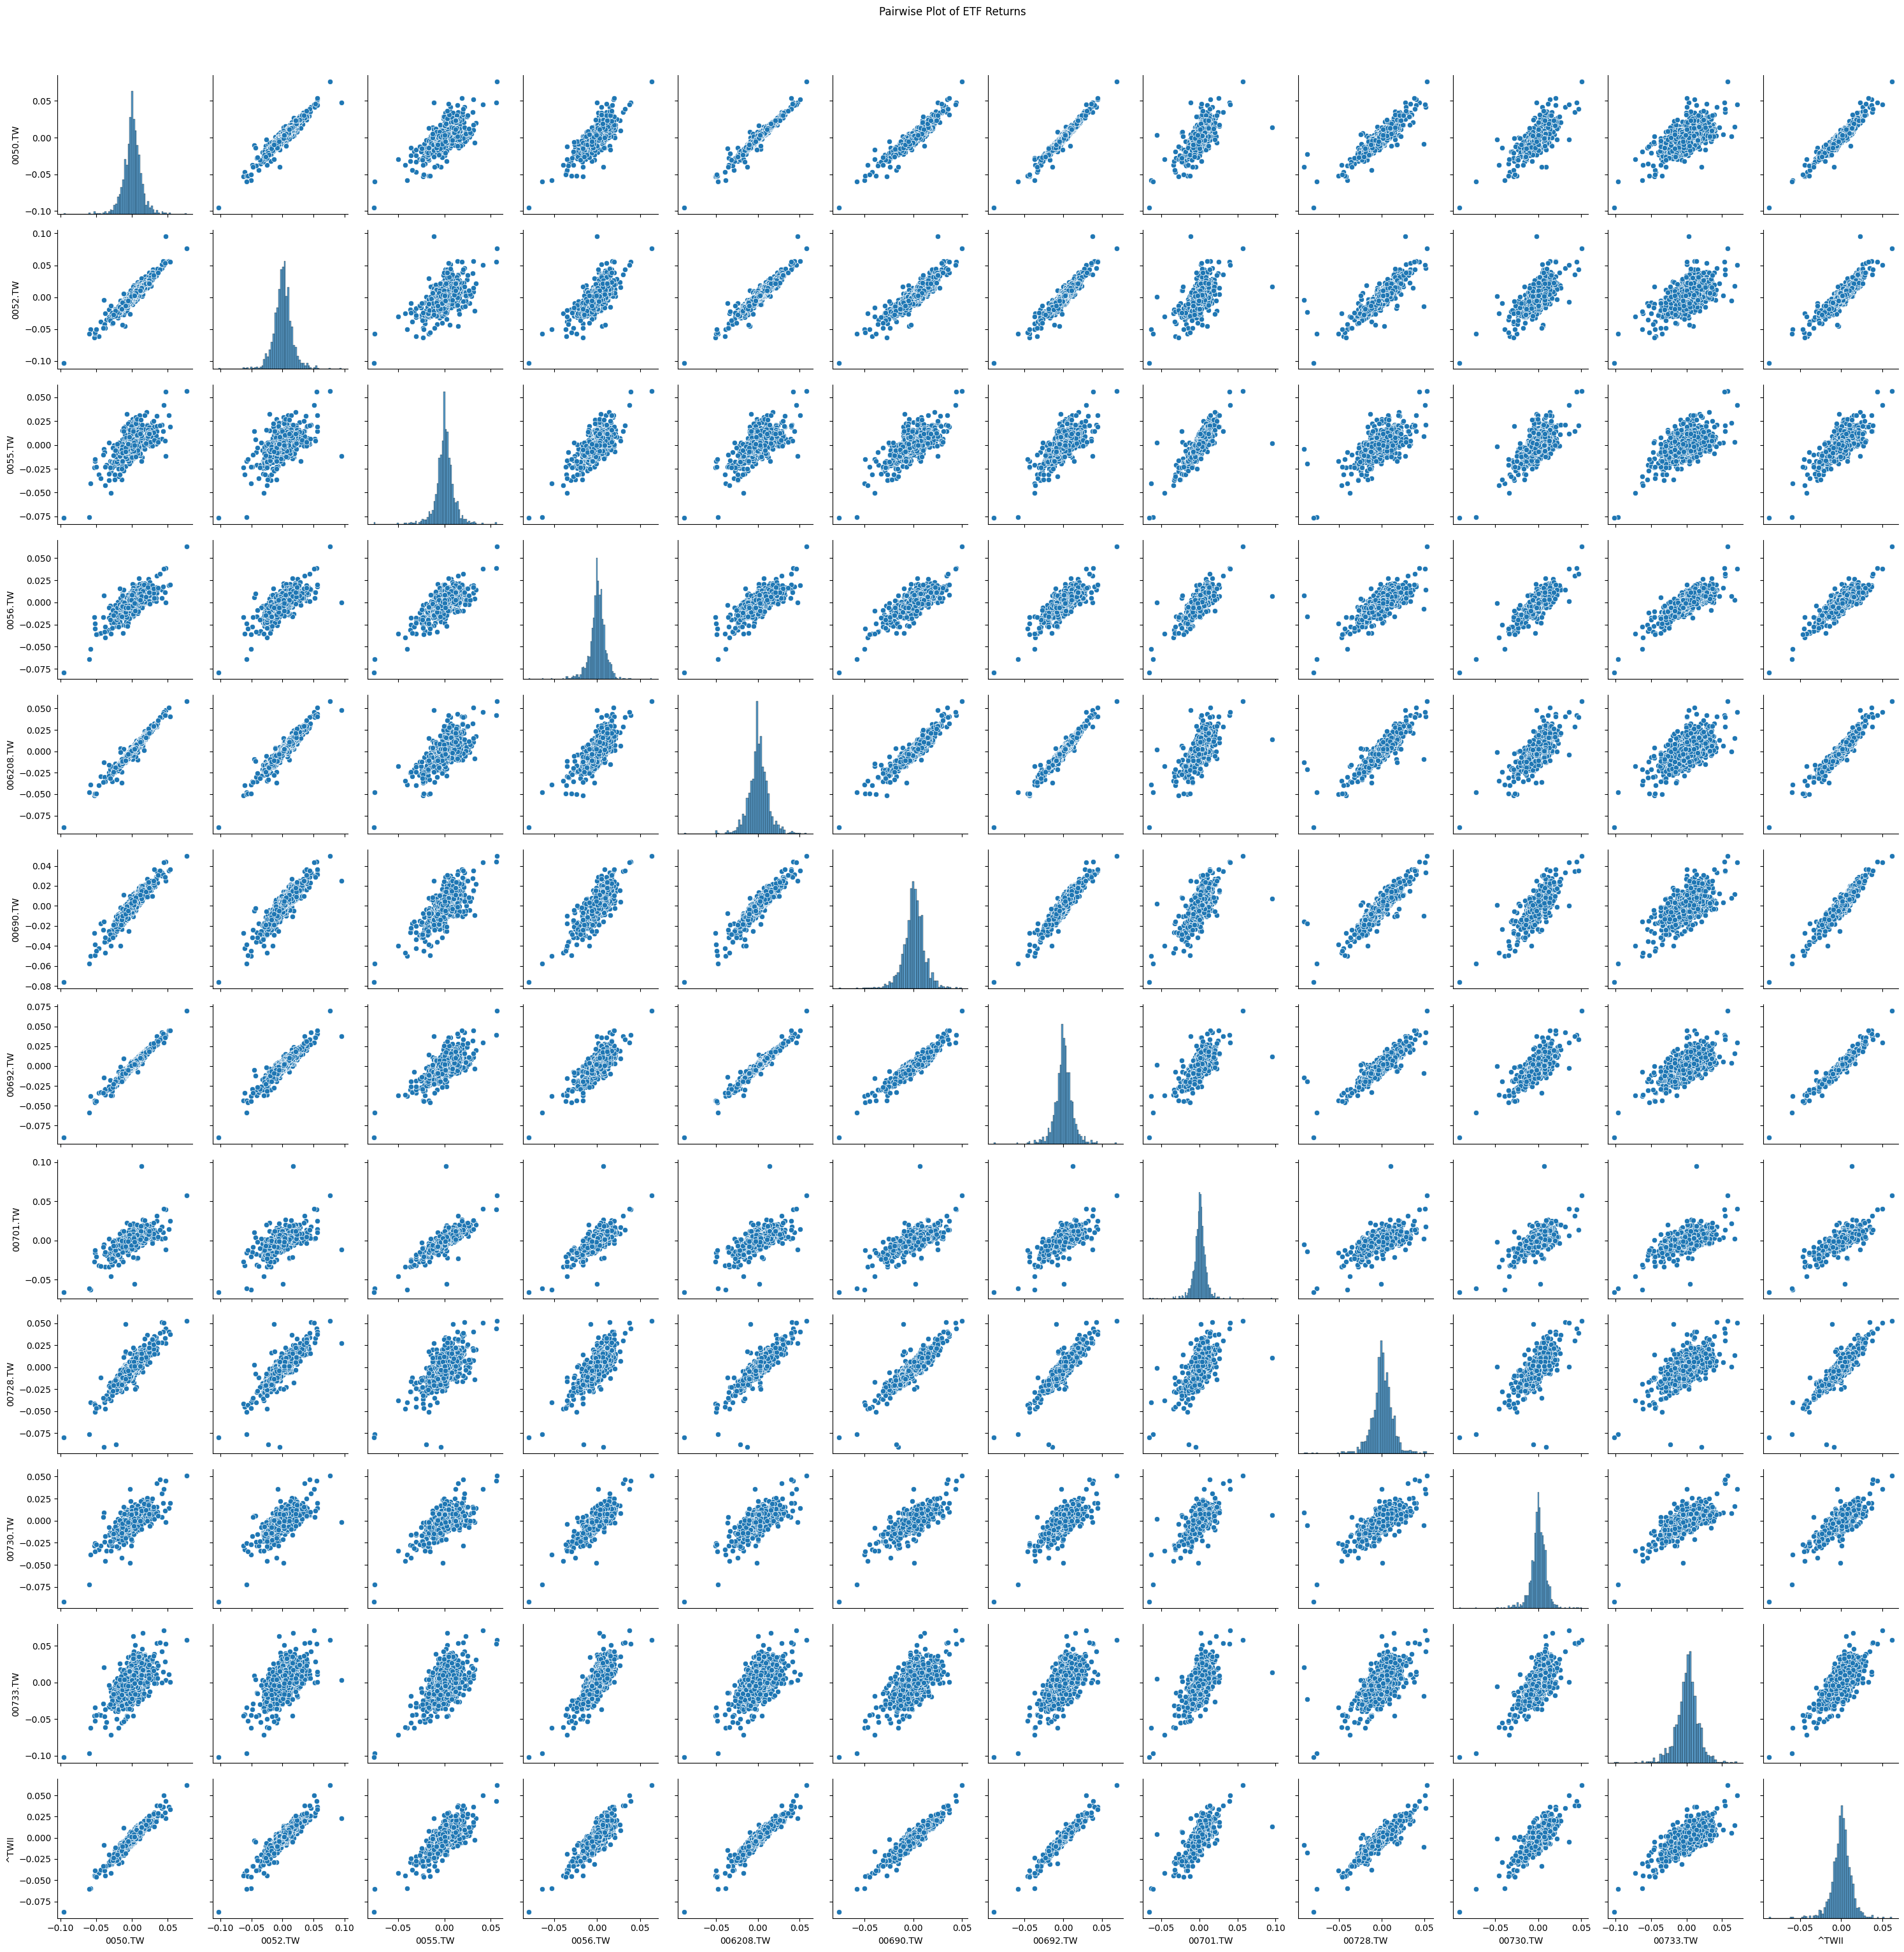

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairwise plot of the returns
sns.pairplot(RET)
plt.suptitle('Pairwise Plot of ETF Returns', y=1.02) # Add a title to the plot
plt.tight_layout()
plt.show()

## (8) 熱圖 (Hot Map)

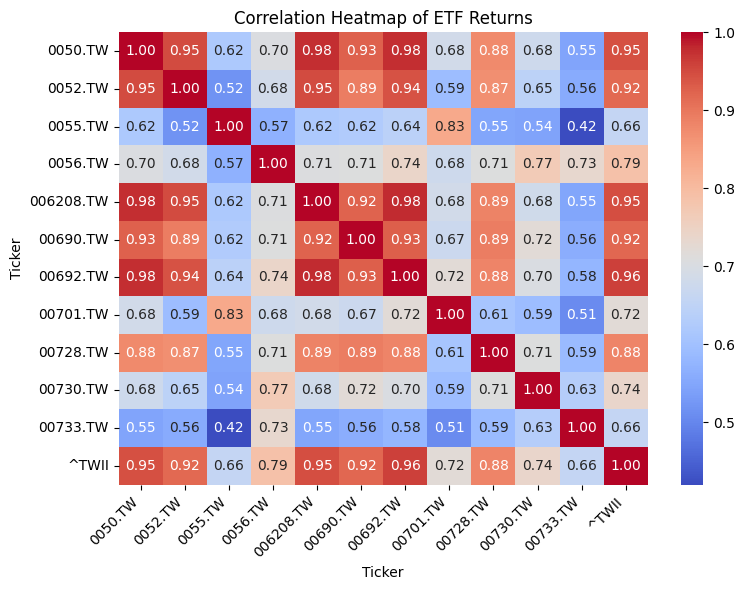

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(scorr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of ETF Returns')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## (9) 邊際分佈圖

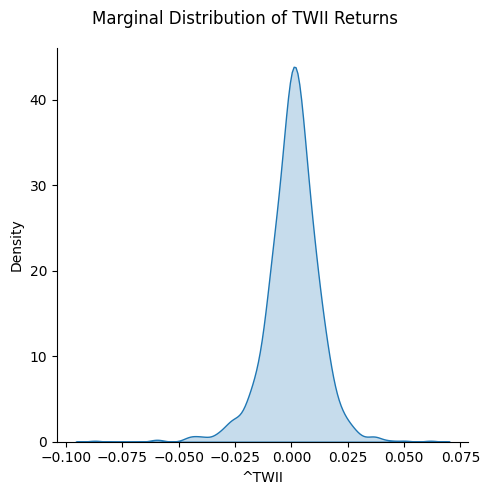

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a displot to show the marginal distribution of returns
x=RET['^TWII']
sns.displot(x, kind='kde', fill=True)
plt.suptitle('Marginal Distribution of TWII Returns')
plt.tight_layout()
plt.show()